In [ ]:
git branch

# **Stock market prediction using Linear Regression algorithim**

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

 **Collecting Data Using Y Finance**

In [ ]:
# downloading the stock-market data of Reliance from YahooFinance
# for tcs is "RELIANCE.NS".
# in yahoo finance all the stocks listed in nifty have a ".NS" and
# the stocks listed in sensex has ".BS"
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2022,3,31)
reliance = yf.download("RELIANCE.NS",start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
reliance.to_csv('RELIANCE')

**EDA**

In [ ]:
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,418.037415,419.325226,415.610443,416.402924,386.519775,3152667
2013-01-02,418.037415,423.981079,417.319244,419.993866,389.853027,6203434
2013-01-03,420.315826,426.952911,418.334595,426.333771,395.737946,7968629
2013-01-04,426.903381,428.240692,422.767578,426.878632,396.243713,6140890
2013-01-07,428.785553,431.410645,421.900787,424.278259,393.829956,7064261


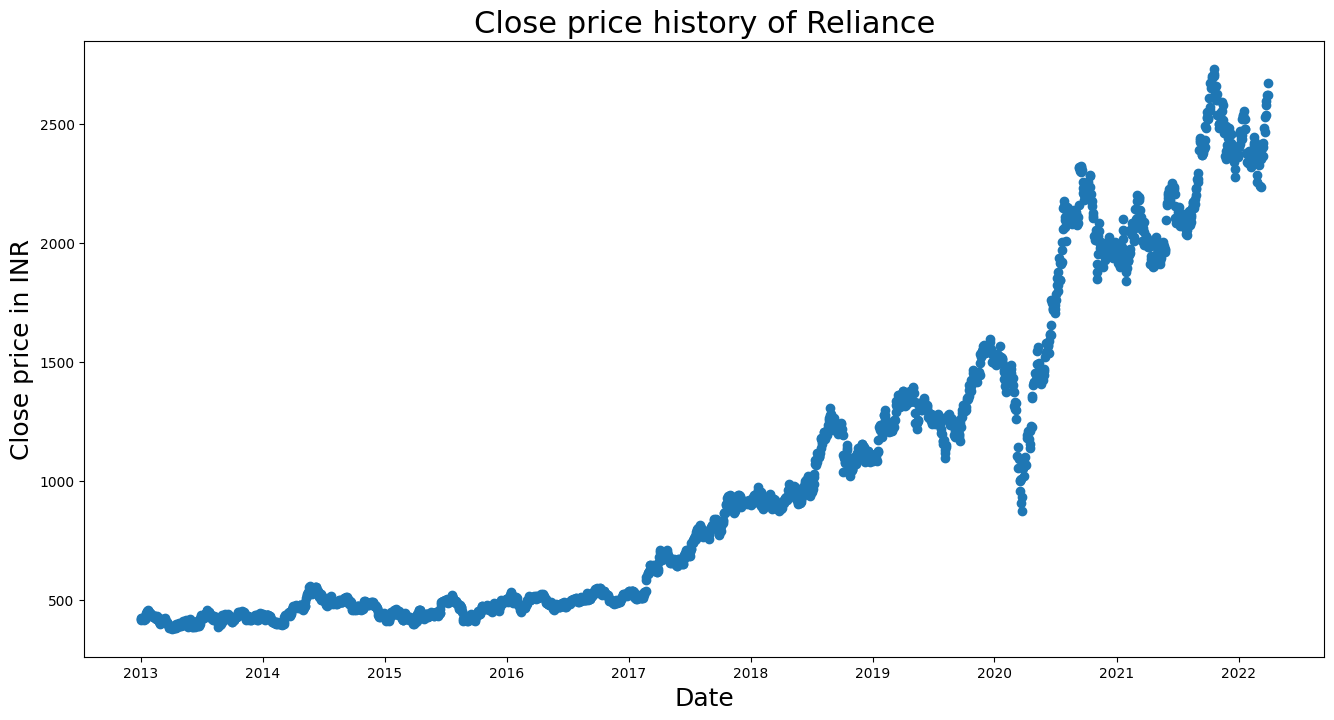

In [ ]:
# plotting the "Close" price of TCS to analyse the trend
plt.figure(figsize=(16,8))
plt.scatter(reliance.index,reliance['Close'])
# plt.scatter(tcs['Close'],tcs.index)
plt.title('Close price history of Reliance',fontsize=22)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in INR',fontsize=18)
plt.show()

In [ ]:
after_covid= reliance.loc[reliance.index > datetime.datetime(2020,3,31)]

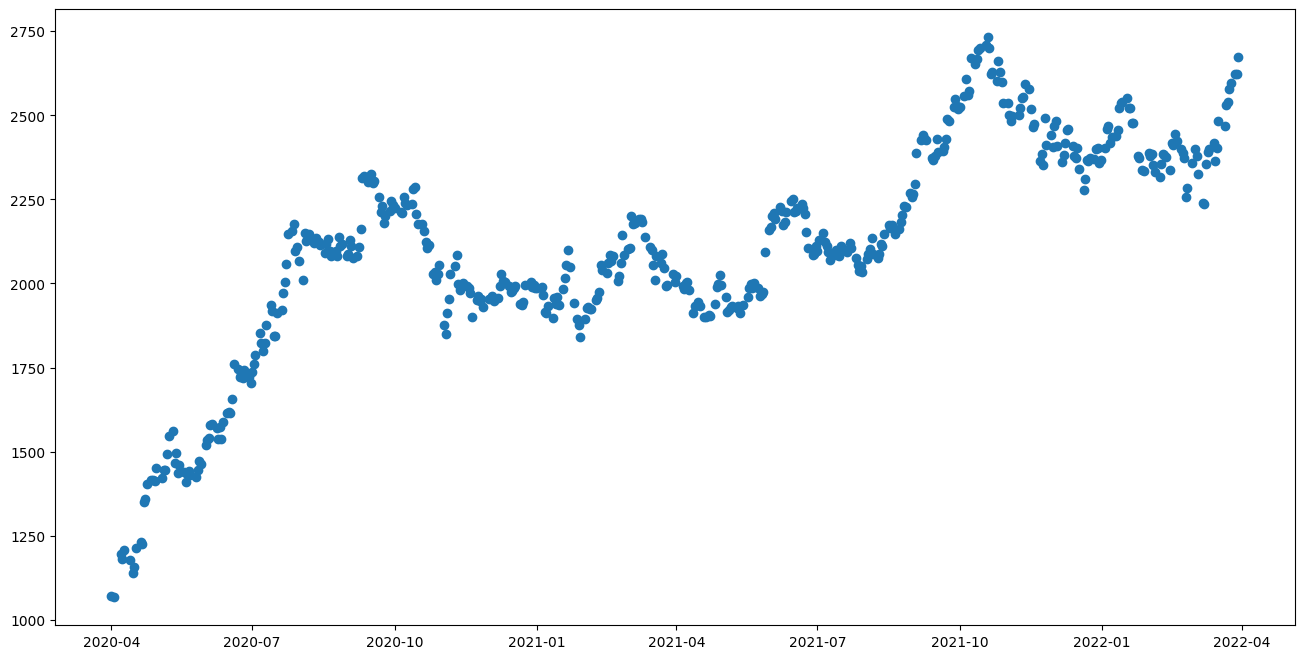

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(after_covid.index,after_covid['Close'])
plt.show()

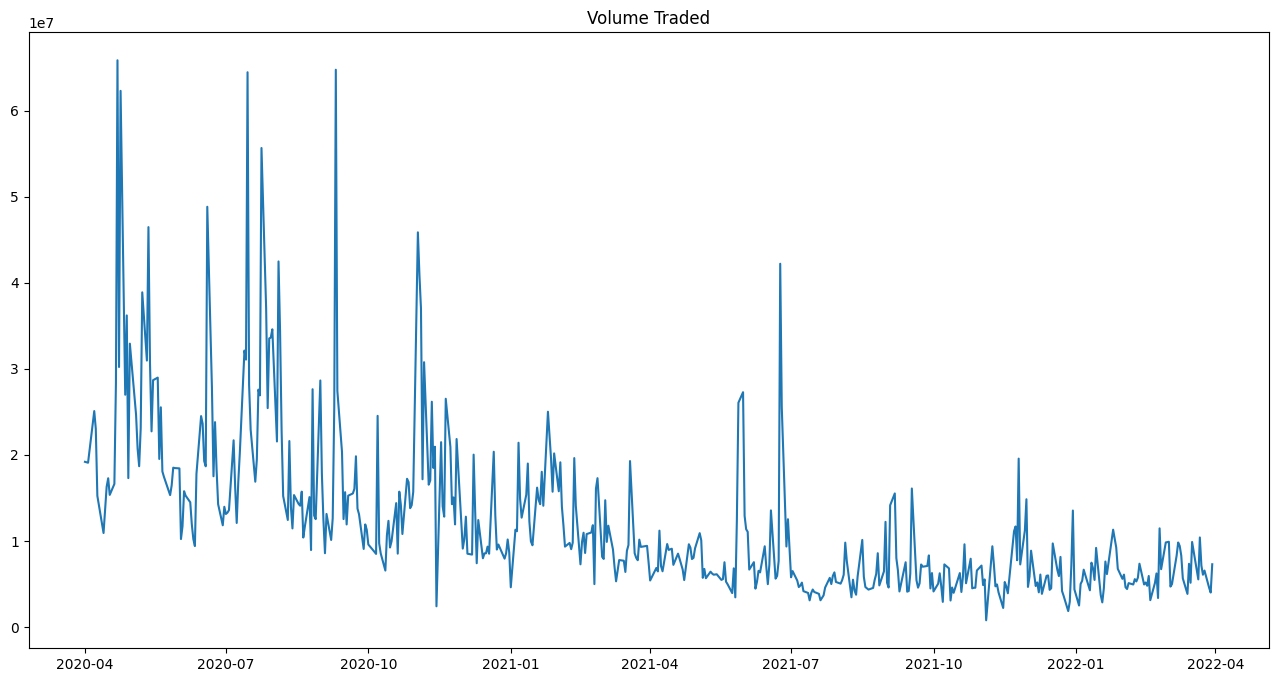

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Volume Traded')
plt.plot(after_covid.index,after_covid['Volume'])
plt.show()

In [ ]:
reliance.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999762,0.999771,0.999519,0.999507,0.232417
High,0.999762,1.000000,0.999710,0.999821,0.999809,0.241566
Low,0.999771,0.999710,1.000000,0.999800,0.999784,0.226685
Close,0.999519,0.999821,0.999800,1.000000,0.999985,0.235095
Adj Close,0.999507,0.999809,0.999784,0.999985,1.000000,0.235166
Volume,0.232417,0.241566,0.226685,0.235095,0.235166,1.000000


In [ ]:
reliance.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
X = reliance.iloc[:,0:3]
y = reliance.iloc[:,3]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 467.94556828, 1073.94923626,  487.29857898,  414.12673176,
        424.09559737, 1337.71443846, 2290.86603452,  513.08426273,
       2090.30586701,  446.46563734, 1181.29957333, 1252.80733359,
       2500.6400756 ,  657.66226761,  384.24147253, 2427.07732101,
        524.22433406, 2282.10307316,  440.24158812,  879.64413585,
       1596.09242951,  410.72750669,  389.40216791,  433.81546851,
       1625.11600396, 2450.70048944,  690.88006861,  683.88657197,
        554.5918628 ,  971.5940801 , 1221.03215163, 2054.32584887,
       2559.28714479,  416.55762575,  635.7134423 ,  688.03675054,
        390.52145515,  498.1980767 ,  933.59916877,  427.06579025,
        890.26250159,  437.94216874, 2372.03937857, 1545.7971492 ,
       1057.9903061 ,  427.26792548,  511.62066948,  984.75187128,
        512.74678887,  405.23749371, 1372.66221174,  542.13717643,
        953.57780407, 1780.95340752,  940.46879336,  405.49412753,
       1967.58370218,  480.87579021, 1314.13756393, 1459.90419

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9998898408977644
4.320946176765638
47.62178814402961


In [ ]:
new_start_date = end
new_end_date = datetime.datetime(2023,8,31)

In [ ]:
reliance_new = yf.download("RELIANCE.NS",new_start_date,new_end_date)
reliance_new.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-31,2664.949951,2669.699951,2628.600098,2634.750000,2617.594727,6102744
2022-04-01,2636.000000,2665.149902,2622.000000,2655.850098,2638.557373,3656408
2022-04-04,2655.449951,2675.000000,2641.649902,2663.699951,2646.356201,3659307
2022-04-05,2651.100098,2669.899902,2620.699951,2626.050049,2608.951660,6068663
2022-04-06,2587.100098,2634.500000,2587.100098,2619.050049,2601.997070,5656703


In [ ]:
X_new = reliance_new.iloc[:,0:3]
y_new = reliance_new.iloc[:,3]

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
results = pd.DataFrame({'Actual':y_new,'Predicted':y_pred_new})
results

,Actual,Predicted
Date,,
2022-03-31,2634.750000,2639.581954
2022-04-01,2655.850098,2648.374324
2022-04-04,2663.699951,2660.353811
2022-04-05,2626.050049,2641.790653
2022-04-06,2619.050049,2625.465445
...,...,...
2023-08-24,2479.800049,2484.007130
2023-08-25,2468.350098,2484.599019
2023-08-28,2443.750000,2448.597649


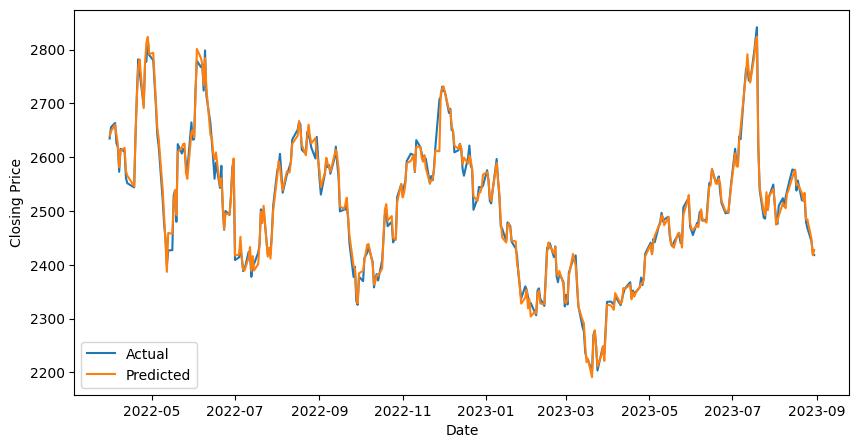

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [ ]:
print(r2_score(y_new,y_pred_new))
print(mean_absolute_error(y_new,y_pred_new))
print(mean_squared_error(y_new,y_pred_new))

0.9909922118126482
8.724898111945253
143.23262775827064
